## Вариант 13

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Нужно создать алгоритм построения интерполяционных сплайнов. 

Для проверки работоспособности программы требуется для той же функции 𝑓(𝑥),
что и в работе 2.1, задав отрезок [𝑎, 𝑏] из крайних точек, выбирая промежуточные точки с
шагом $ℎ=\frac{a - b}{N}$ 

𝑁 задано, построить следующие интерполяционные сплайны:
 - Линейный
 - Квадратичный с граничным условием $𝑓^\prime(𝑎) = 0$
 - Квадратичный с граничным условием $𝑓^\prime(b) = 0$
 - Кубический с граничными условиями $𝑓^{\prime\prime}(𝑎) = 𝑓^{\prime\prime}(b) = 0$

Построим график заданной функции на участке от 0 до 1:

<Figure size 720x432 with 0 Axes>

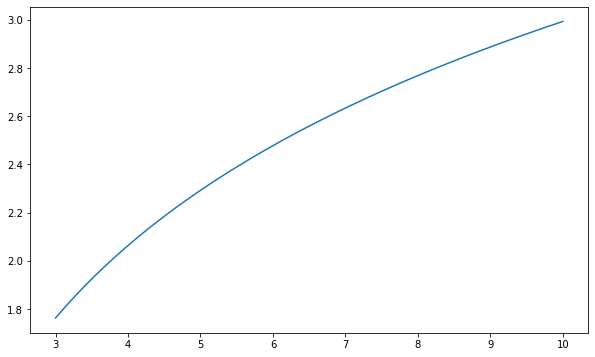

In [4]:
plt.figure(figsize=(10,6))
x = np.linspace(3, 10, 100)
y = np.log(x+(x*x-1)**0.5)

plt.figure(figsize=(10,6))
plt.plot(x, y);

Массив опорных точек по которому нужно восстановить функцию:

#### N = 10

In [74]:
X = np.array([3, 4, 5, 6, 7, 8, 9, 10])

x = np.linspace(3, 10, 100)
Y = np.log(X+(X*X-1)**0.5)

In [75]:
data = pd.DataFrame(columns = ['x', 'f(x)'],
            data = np.array([X, Y]).T)
# выведем несколько точек
data.head()

,x,f(x)
0,3.0,1.762747
1,4.0,2.063437
2,5.0,2.292432
3,6.0,2.477889
4,7.0,2.633916


In [76]:
L, F = [], []
for i in range(data.x.shape[0] - 1):
    L.append((data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))
    F.append(data['f(x)'][i] - data['x'][i] * (data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))

In [77]:
def linear_function(i, x, L, F):
    return L[i] * x + F[i] 

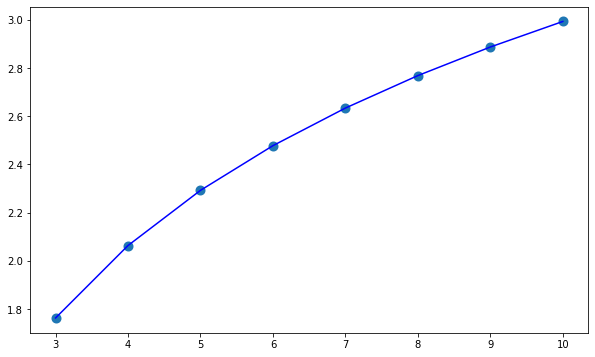

In [78]:
s = []
for i in range(data.x.shape[0]):
    if i == 0 or i == 1:
        s.append(linear_function(0, data.x[i], L, F))
    else:
        s.append(linear_function(i - 1, data.x[i], L, F))

plt.figure(figsize=(10,6))
plt.plot(data.x.iloc[:10], s, color = 'b')
plt.scatter(data['x'].iloc[:10], data['f(x)'].iloc[:10], linewidths = 4);

In [79]:
for i in range(data.x.shape[0] - 1):
    print('{ %.4f' % data.x[i], '%.4f' % data.x[i + 1], '}: ',
          '%.4f' % L[i], '* x + ', '%.4f' % F[i])

{ 3.0000 4.0000 }:  0.3007 * x +  0.8607
{ 4.0000 5.0000 }:  0.2290 * x +  1.1475
{ 5.0000 6.0000 }:  0.1855 * x +  1.3651
{ 6.0000 7.0000 }:  0.1560 * x +  1.5417
{ 7.0000 8.0000 }:  0.1347 * x +  1.6907
{ 8.0000 9.0000 }:  0.1186 * x +  1.8198
{ 9.0000 10.0000 }:  0.1060 * x +  1.9337


#### N = 50

In [80]:
def linear_interp(N):
    X = np.linspace(3, 10, N)
    Y = np.log(X+(X*X-1)**0.5)
    data = pd.DataFrame(columns = ['x', 'f(x)'],
            data = np.array([X, Y]).T)
    
    L, F = [], []
    for i in range(data.x.shape[0] - 1):
        L.append((data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))
        F.append(data['f(x)'][i] - data['x'][i] * (data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))
        
    s = []
    for i in range(data.x.shape[0]):
        if i == 0 or i == 1:
            s.append(linear_function(0, data.x[i], L, F))
        else:
            s.append(linear_function(i - 1, data.x[i], L, F))
            
    plt.figure(figsize=(10,6))
    plt.plot(data.x, s, color = 'b')
    plt.scatter(data['x'], data['f(x)']);
    
    for i in range(data.x.shape[0] - 1):
        print('{ %.4f' % data.x[i], '%.4f' % data.x[i + 1], '}: ', '%.4f' % L[i], '* x + ', '%.4f' % F[i])

{ 3.0000 3.1429 }:  0.3444 * x +  0.7295
{ 3.1429 3.2857 }:  0.3274 * x +  0.7829
{ 3.2857 3.4286 }:  0.3121 * x +  0.8333
{ 3.4286 3.5714 }:  0.2982 * x +  0.8809
{ 3.5714 3.7143 }:  0.2855 * x +  0.9262
{ 3.7143 3.8571 }:  0.2739 * x +  0.9693
{ 3.8571 4.0000 }:  0.2632 * x +  1.0104
{ 4.0000 4.1429 }:  0.2534 * x +  1.0498
{ 4.1429 4.2857 }:  0.2443 * x +  1.0876
{ 4.2857 4.4286 }:  0.2358 * x +  1.1239
{ 4.4286 4.5714 }:  0.2279 * x +  1.1588
{ 4.5714 4.7143 }:  0.2206 * x +  1.1924
{ 4.7143 4.8571 }:  0.2137 * x +  1.2249
{ 4.8571 5.0000 }:  0.2072 * x +  1.2563
{ 5.0000 5.1429 }:  0.2011 * x +  1.2867
{ 5.1429 5.2857 }:  0.1954 * x +  1.3161
{ 5.2857 5.4286 }:  0.1900 * x +  1.3447
{ 5.4286 5.5714 }:  0.1849 * x +  1.3724
{ 5.5714 5.7143 }:  0.1801 * x +  1.3994
{ 5.7143 5.8571 }:  0.1755 * x +  1.4256
{ 5.8571 6.0000 }:  0.1711 * x +  1.4511
{ 6.0000 6.1429 }:  0.1670 * x +  1.4759
{ 6.1429 6.2857 }:  0.1631 * x +  1.5001
{ 6.2857 6.4286 }:  0.1593 * x +  1.5238
{ 6.4286 6.5714 

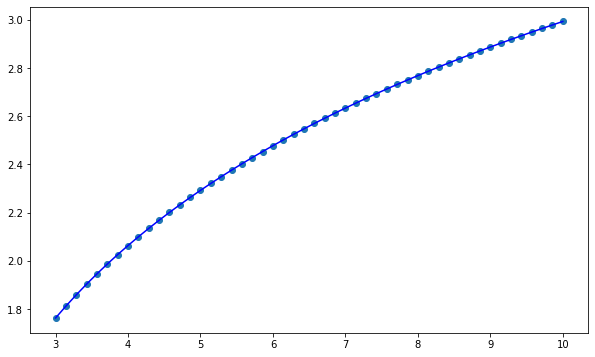

In [81]:
linear_interp(50)

#### Квадратичный сплайн слева

In [82]:
from sympy import *
x = symbols('x')
y = ln(x+(x*x-1)**0.5)

In [83]:
def left_square_interp(y, ab, N):
    xi = []
    yi = []
    a = ab[0]
    b = ab[1]
    h = (b - a) / N
    while a < b:
        xi.append(a)
        yi.append(y.evalf(subs={'x': a}))
        a += h
    if round(a - h, 5) != b:
        xi.append(b)
        yi.append(y.evalf(subs={'x': a}))

    const = [[] for i in range(N)]
    for i in range(N):
        A = numpy.array([[1, xi[i], xi[i] ** 2], [1, xi[i + 1], xi[i + 1] ** 2], [0, 1, 2 * xi[i]]])
        if i == 0: a = numpy.array([yi[i], yi[i + 1], 0])
        else: a = numpy.array([yi[i], yi[i + 1], const[i - 1][1] + 2 * const[i - 1][2] * xi[i]])
        for j in np.linalg.solve(A, a.astype(float64)): const[i].append(float(j))


    yn = {}
    for i in range(N):
        yn[xi[i], xi[i + 1]] = const[i][0] + const[i][1] * x + const[i][2] * x ** 2
        
    return yn

#### N = 10

In [84]:
interp = left_square_interp(y, [3, 10], 10)

In [85]:
for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 3.0000 , 3.7000 } :  0.448877082943096*x**2 - 2.69326249765858*x + 5.80264092052695
{ 3.7000 , 4.4000 } :  -0.532684785714558*x**2 + 4.57029533040806*x - 7.63494106139633
{ 4.4000 , 5.1000 } :  0.47588780959131*x**2 - 4.30514350828358*x + 11.8910243837253
{ 5.1000 , 5.8000 } :  -0.517109578802075*x**2 + 5.82342985332896*x - 13.9368376883867
{ 5.8000 , 6.5000 } :  0.485752305207634*x**2 - 5.80976800118367*x + 19.7994360896999
{ 6.5000 , 7.2000 } :  -0.510442738229758*x**2 + 7.14076756350243*x - 22.2898044955299
{ 7.2000 , 7.9000 } :  0.490479552994798*x**2 - 7.27251343013118*x + 29.5980070815511
{ 7.9000 , 8.6000 } :  -0.506964145354636*x**2 + 8.48709700378988*x - 32.6524541324371
{ 8.6000 , 9.3000 } :  0.493116239118366*x**2 - 8.71428560914576*x + 41.3134911031862
{ 9.3000 , 10.0000 } :  -0.504916571981196*x**2 + 9.84912467730609*x - 45.0063667288149


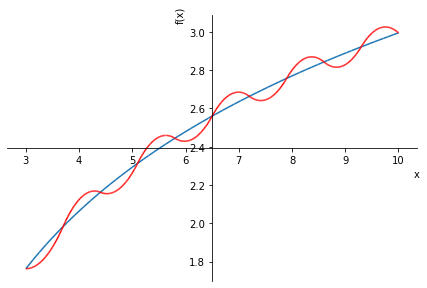

In [86]:
p = plot(y, (x, 3, 10), show=False)
for i, j in left_square_interp(y, [3, 10], 10):
    p.extend(plot(left_square_interp(y, [3, 10], 10)[i, j], (x, i, j), line_color='r', show=False))
p.show()        

#### N = 50

In [87]:
interp = left_square_interp(y, [3, 10], 50)

In [89]:
for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 3.0000 , 3.1400 } :  2.46143749291371*x**2 - 14.7686249574823*x + 23.9156846102625
{ 3.1400 , 3.2800 } :  -2.58067841635164*x**2 + 16.8958629527041*x - 25.7975614087302
{ 3.2800 , 3.4200 } :  2.47294398873031*x**2 - 16.2559000246335*x + 28.5713298741035
{ 3.4200 , 3.5600 } :  -2.57081658555779*x**2 + 18.2434223034972*x - 30.4225113069999
{ 3.5600 , 3.7000 } :  2.48146836483727*x**2 - 17.7288465433157*x + 33.608127240327
{ 3.7000 , 3.8400 } :  -2.56339235958632*x**2 + 19.6031228174189*x - 35.4560160770319
{ 3.8400 , 3.9800 } :  2.48797836906932*x**2 - 19.1914043786564*x + 39.0294761394326
{ 3.9800 , 4.1200 } :  -2.55764904379088*x**2 + 20.9717898277108*x - 40.8952803312381
{ 4.1200 , 4.2600 } :  2.49307340321965*x**2 - 20.646163135656*x + 44.8377027732975
{ 4.2600 , 4.4000 } :  -2.55310627934045*x**2 + 22.3472877597561*x - 46.7383476339302
{ 4.4000 , 4.5400 } :  2.49714247995442*x**2 - 22.0949013220388*x + 51.0344683460184
{ 4.5400 , 4.6800 } :  -2.5494460251033*x**2 + 23.728122303885

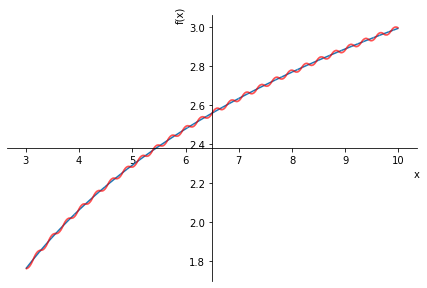

In [90]:
p = plot(y, (x, 3, 10), show=False)
for i, j in interp:
    p.extend(plot(left_square_interp(y, [3, 10], 50)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

#### Квадратичный сплайн справа

In [91]:
def right_square_interp(y, ab, N):    
    xi = []
    yi = []
    a = ab[0]
    b = ab[1]
    h = (b - a) / N
    while a < b:
        xi.append(a)
        yi.append(y.evalf(subs = {'x': a}))
        a += h
    if round(a - h, 5) != b:
        xi.append(b)
        yi.append(y.evalf(subs = {'x': b}))

    const = [[] for i in range(N)]
    for i in range(N, 0, -1):
        A = numpy.array([[1, xi[i], xi[i] ** 2], [1, xi[i - 1], xi[i - 1] ** 2], [0, 1, 2 * xi[i]]])
        if i == N: a = numpy.array([yi[i], yi[i - 1], 0])
        else: a = numpy.array([yi[i], yi[i - 1], const[N - 1 - i][1] + 2 * const[N - 1 - i][2] * xi[i]])
        for j in np.linalg.solve(A, a.astype(float64)): const[N - i].append(float(j))

    const_new = []
    for i in reversed(const): const_new.append(i)

    yn = {}
    for i in range(N):
        yn[xi[i], xi[i + 1]] = const_new[i][0] + const_new[i][1] * x + const_new[i][2] * x ** 2

    return yn

#### N = 10

In [93]:
interp = right_square_interp(y, [3, 10], 10)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 3.0000 , 3.7000 } :  0.0928674224890633*x**2 - 0.307997772616557*x + 1.85093368948719
{ 3.7000 , 4.4000 } :  -0.176675125260522*x**2 + 1.68661708073038*x - 1.83910378920464
{ 4.4000 , 5.1000 } :  0.119878149137275*x**2 - 0.92305173397024*x + 3.90216760313672
{ 5.1000 , 5.8000 } :  -0.161099918348043*x**2 + 1.94292455438001*x - 3.40607193215641
{ 5.8000 , 6.5000 } :  0.129742644753605*x**2 - 1.43084917759912*x + 6.37787189058304
{ 6.5000 , 7.2000 } :  -0.154433077775732*x**2 + 2.26343521528227*x - 5.62855238628147
{ 7.2000 , 7.9000 } :  0.134469892540769*x**2 - 1.89676755727534*x + 9.34817759492595
{ 7.9000 , 8.6000 } :  -0.150954484900598*x**2 + 2.61293760629826*x - 8.46515780118979
{ 8.6000 , 9.3000 } :  0.137106578664315*x**2 - 2.34171268701826*x + 12.8398384600712
{ 9.3000 , 10.0000 } :  -0.148906911527149*x**2 + 2.97813823054297*x - 11.8974683065885


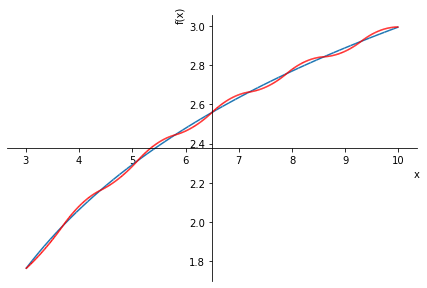

In [95]:
p = plot(y, (x, 3, 10), show = False)
for i, j in interp:
    p.extend(plot(right_square_interp(y, [3, 10], 10)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

#### N = 50

In [96]:
interp = right_square_interp(y, [3, 10], 50)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 3.0000 , 3.1400 } :  0.655135717347764*x**2 - 3.67793205550734*x + 6.90032188443123
{ 3.1400 , 3.2800 } :  -0.774376640785777*x**2 + 5.2994055535713*x - 7.19409816182223
{ 3.2800 , 3.4200 } :  0.666642213164522*x**2 - 4.15367812834266*x + 8.30895907651666
{ 3.4200 , 3.5600 } :  -0.764514809992095*x**2 + 5.6354359100486*x - 8.43042592913239
{ 3.5600 , 3.7000 } :  0.675166589271677*x**2 - 4.61509565270946*x + 9.81552025257695
{ 3.7000 , 3.8400 } :  -0.757090584020649*x**2 + 5.98360742965375*x - 9.79208044979499
{ 3.8400 , 3.9800 } :  0.681676593503739*x**2 - 5.06612449373355*x + 11.4234048431086
{ 3.9800 , 4.1200 } :  -0.751347268225566*x**2 + 6.34074544563172*x - 11.2762663362283
{ 4.1200 , 4.2600 } :  0.686771627654108*x**2 - 5.5093542564168*x + 13.1349390499917
{ 4.2600 , 4.4000 } :  -0.74680450377463*x**2 + 6.70471438335605*x - 12.8810271527245
{ 4.4000 , 4.5400 } :  0.690840704388653*x**2 - 5.94656344848084*x + 14.9517840773167
{ 4.5400 , 4.6800 } :  -0.743144249537732*x**2 + 7.07

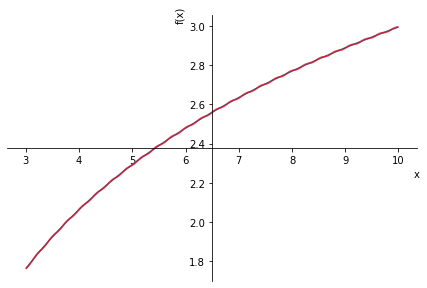

In [97]:
p = plot(y, (x, 3, 10), show = False)
for i, j in interp:
    p.extend(plot(right_square_interp(y, [3, 10], 50)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

#### Кубический сплайн

In [98]:
def cube_interp(y, ab, N):
    xi = []
    yi = []
    a = ab[0]
    b = ab[1]
    h = (b - a) / N
    while a < b:
        xi.append(a)
        yi.append(y.evalf(subs = {'x': a}))
        a += h
    if round(a - h, 5) != b:
        xi.append(b)
        yi.append(y.evalf(subs = {'x': b}))

    A = numpy.zeros([N - 1, N - 1])
    A[0, 0] = 2 * (xi[2] - xi[0])
    A[0, 1] = xi[2] - xi[1]
    A[N - 2, N - 3] = xi[N - 1] - xi[N - 2]
    A[N - 2, N - 2] = 2 * (xi[N] - xi[N - 2])
    for i in range(2, N - 1):
        A[i - 1, i - 2] = xi[i] - xi[i - 1]
        A[i - 1, i - 1] = 2 * (xi[i + 1] - xi[i - 1])
        A[i - 1, i] = xi[i + 1] - xi[i]

    a = numpy.zeros([N - 1])
    for i in range(1, N):
        a[i - 1] = 6 * ((yi[i + 1] - yi[i]) / (xi[i + 1] - xi[i]) - (yi[i] - yi[i - 1]) / (xi[i] - xi[i - 1]))

    ci = [0]
    for j in np.linalg.solve(A, a):
        ci.append(float(j))
    ci.append(0)

    di = [0]
    for i in range(1, N + 1):
        di.append((ci[i] - ci[i - 1]) / (xi[i] - xi[i - 1]))

    bi = [0]
    for i in range(1, N + 1):
        hi = xi[i] - xi[i - 1]
        bi.append(ci[i] * hi / 2 - di[i] * hi ** 2 / 6 + (yi[i] - yi[i - 1]) / hi)

    ai = []
    for i in yi: ai.append(i)

    yn = {}
    for i in range(1, N + 1):
        yn[xi[i - 1], xi[i]] = ai[i] + bi[i] * (x - xi[i]) + ci[i] * (x - xi[i]) ** 2 / 2 + di[i] * (x - xi[i]) ** 3 / 6

    return yn

#### N = 10

In [99]:
interp = cube_interp(y, [3, 10], 10)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)
    print(' ')

{ 3.0000 , 3.7000 } :  0.28756102740208*x - 1.37760295573887*(0.27027027027027*x - 1)**3 - 0.781882758662603*(0.27027027027027*x - 1)**2 + 0.918721143293507
 
{ 3.7000 , 4.4000 } :  0.231503039543409*x + 1.38501095087242*(0.227272727272727*x - 1)**3 - 0.44468791233289*(0.227272727272727*x - 1)**2 + 1.14296756697431
 
{ 4.4000 , 5.1000 } :  0.200444561286343*x + 0.0991458377043637*(0.196078431372549*x - 1)**3 - 0.556609778410728*(0.196078431372549*x - 1)**2 + 1.29036715638867
 
{ 5.1000 , 5.8000 } :  0.174897096971846*x + 0.585642399710933*(0.172413793103448*x - 1)**3 - 0.50784760218658*(0.172413793103448*x - 1)**2 + 1.42908606758274
 
{ 5.8000 , 6.5000 } :  0.155729442595969*x + 0.367568091504963*(0.153846153846154*x - 1)**3 - 0.519076042688251*(0.153846153846154*x - 1)**2 + 1.54673760015482
 
{ 6.5000 , 7.2000 } :  0.14024734051919*x + 0.436230633575618*(0.138888888888889*x - 1)**3 - 0.509663155217973*(0.138888888888889*x - 1)**2 + 1.65258956011876
 
{ 7.2000 , 7.9000 } :  0.127570804

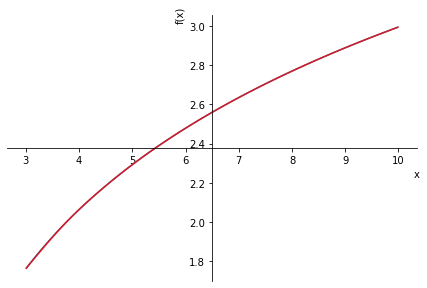

In [100]:
p = plot(y, (x, 3, 10), show = False)
for i, j in interp:
    p.extend(plot(cube_interp(y, [3, 10], 10)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

#### N = 50

In [101]:
interp = cube_interp(y, [3, 10], 50)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)
    print(' ')

{ 3.0000 , 3.1400 } :  0.337397241924561*x - 5.68953807834161*(0.318471337579618*x - 1)**3 - 0.761021016848241*(0.318471337579618*x - 1)**2 + 0.751564009257075
 
{ 3.1400 , 3.2800 } :  0.319734085955734*x + 2.36982634275497*(0.304878048780488*x - 1)**3 - 0.526942231903421*(0.304878048780488*x - 1)**2 + 0.808170599727114
 
{ 3.2800 , 3.4200 } :  0.305863073011201*x - 0.106618279360909*(0.292397660818713*x - 1)**3 - 0.585978578610691*(0.292397660818713*x - 1)**2 + 0.854642149943962
 
{ 3.4200 , 3.5600 } :  0.292655330489653*x + 0.629191205010288*(0.280898876404494*x - 1)**3 - 0.560704951400965*(0.280898876404494*x - 1)**2 + 0.900718038181633
 
{ 3.5600 , 3.7000 } :  0.28072457015022*x + 0.393671585924385*(0.27027027027027*x - 1)**3 - 0.560985438437193*(0.27027027027027*x - 1)**2 + 0.94401603512539
 
{ 3.7000 , 3.8400 } :  0.269721023532381*x + 0.45281555920006*(0.260416666666667*x - 1)**3 - 0.554714852706246*(0.260416666666667*x - 1)**2 + 0.985488433976188
 
{ 3.8400 , 3.9800 } :  0.2595

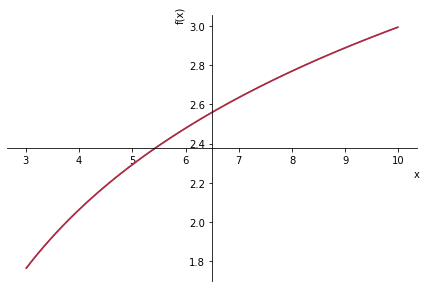

In [102]:
p = plot(y, (x, 3, 10), show = False)
for i, j in interp:
    p.extend(plot(cube_interp(y, [3, 10], 50)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        